# NLP Answers

- **Answer Set**: No. 04
- **Full Name**: Mohammad Hosein Nemati
- **Student Code**: `610300185`

---

## Basics

In this section we will done some basic steps:

### Libraries

Before begin, we must import these required libraries:

In [1]:
import warnings

import math as math
import hazm as hazm

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

import sklearn.tree as sktree
import sklearn.ensemble as skensemble
import sklearn.svm as sksvm

import sklearn.base as skbase
import sklearn.utils as skutils
import sklearn.metrics as skmetrics
import sklearn.pipeline as skpipeline
import sklearn.preprocessing as skprocessing
import sklearn.model_selection as skselection
import sklearn.feature_extraction.text as sktext

warnings.filterwarnings("ignore", category=UserWarning)
sk.set_config(display="diagram")

### Dataset

Now we will load `Persica` corpus and split it into `TestSet` and `TrainSet`:

In [2]:
corpus = hazm.PersicaReader(csv_file="../lib/persica.csv")

data_frame = pd.DataFrame(corpus.docs())
data_frame = skutils.shuffle(data_frame)

data_features = data_frame.filter(["text"], axis=1).to_numpy().flatten()
data_labels = data_frame.filter(["category2"], axis=1).to_numpy().flatten()

data_labels = skprocessing.LabelEncoder().fit(data_labels).transform(data_labels)

train_features, test_features, train_labels, test_labels = skselection.train_test_split(
    data_features, 
    data_labels, 
    test_size=0.2, 
    random_state=313
)

data_frame

,id,title,text,date,time,category,category2
10594,695799,«بادناوهايم» خانه‌ي دوم عربستان؛ محل اقامت عرب...,به گزارش خبرگزاري دانشجويان ايران (ايسنا)، آلم...,138/5//01,1:4::19,ورزشي-فوتبال-,ورزشي
7689,731506,مدير شبكه سه سيما: بازي‌هاي جام‌جهاني با 5 تا ...,به گفته‌ي مدير شبكه سه سيما، ايران تنها كشور د...,138/5//03,1:3::03,تلويزيون و راديو-,فرهنگي
1923,690895,ونزوئلا كنترل 2 ميدان نفتي را از شركت‌هاي توتا...,ونزوئلا كنترل دو ميدان نفتي اين كشور را از شرك...,138/5//01,0:9::50,انرژي-,اجتماعي
5344,220919,/ درآستانه‌ي جشنواره‌ي مطبوعات/ عضو كميسيون آم...,حسين لقمانيان نماينده‌ي مردم همدان و عضو كميسي...,138/2//02,1:8::29,مجلس-,سياسي
2905,61753,اجراي پروسه آبكاري نيكل سخت در وزارت دفاع,به گزارش ايسنا به نقل از اداره كل تبليغات دفاع...,138/0//05,1:4::11,اقتصاد و بازرگاني-,اقتصادي
...,...,...,...,...,...,...,...
4128,587364,جايگاه عدالت در سلامت كجاست؟ چرا بيماران ايران...,در حالي كه رعايت «عدالت در سلامت» به عنوان يكي...,138/4//07,1:0::11,بهداشت و درمان-عمومي-,بهداشتي
10415,570555,مسابقه دوچرخه سواري كودكان تلاش در تهران برگزا...,به گزارش گروه دريافت خبر ايسنا، اين مسابقه دوش...,138/4//05,1:2::23,قهرماني-همگاني-,ورزشي
5247,305321,/گزارش تصويوري/‌١ ‌١٣ آبان ‌١٣٥٨ به روايت تصوير,خبرگزاري دانشجويان ايران - تهران سرويس: تاريخ,138/2//08,1:2::36,تاريخ-,تاريخي
5281,246553,صفاتي دزفولي: قاطعيت شهيد دكتر بهشتي، از او يك...,ايرج صفاتي دزفولي، عضو هيات امناي بنياد فرهنگي...,138/2//04,1:5::53,تاريخ-,تاريخي


### Analysis

Now, we will analyse `DataSet`, `TrainSet`, `TestSet` and will find these parameters:

- **Sentence Count**: Number of sentences
- **Word Count**: Number of words
- **Unique Word Count**: Number of unique words
- **Average Word/Sentence**: Average number of words per sentence

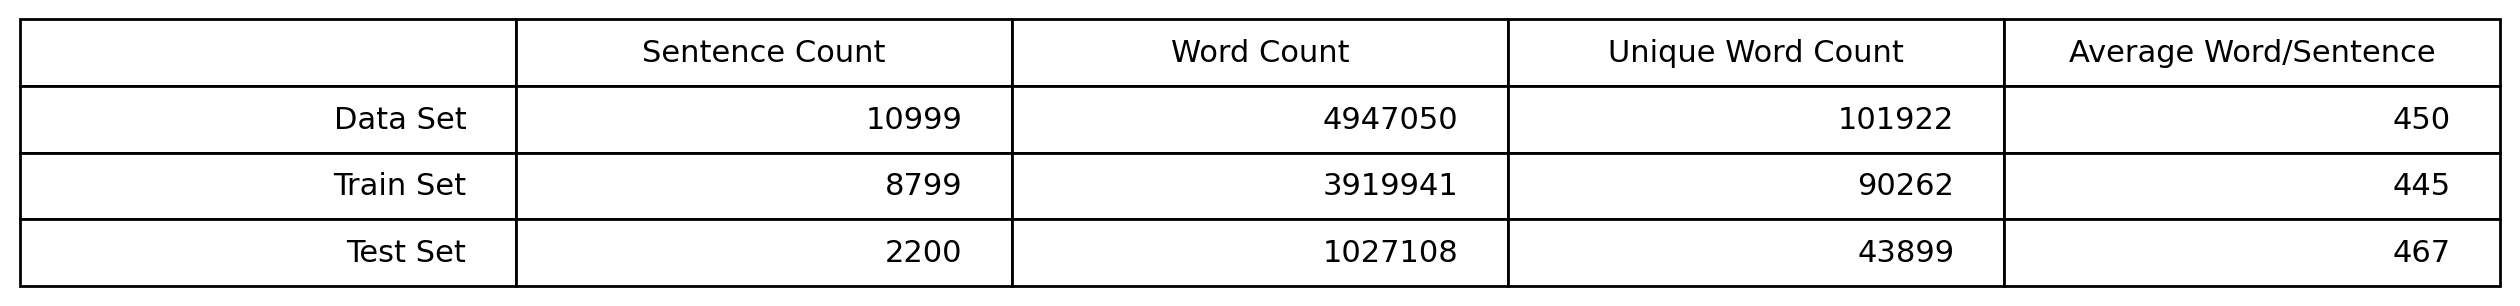

In [3]:
data_words = hazm.word_tokenize('. '.join(data_features))
train_words = hazm.word_tokenize('. '.join(train_features))
test_words = hazm.word_tokenize('. '.join(test_features))

plt.figure(figsize=(8, 1), dpi=200)
table = plt.table(cellText=[
    [
        "Data Set",
        len(data_features),
        len(data_words),
        len(set(data_words)),
        round(len(data_words) / len(data_features))
    ],
    [
        "Train Set",
        len(train_features),
        len(train_words),
        len(set(train_words)),
        round(len(train_words) / len(train_features))
    ],
    [
        "Test Set",
        len(test_features),
        len(test_words),
        len(set(test_words)),
        round(len(test_words) / len(test_features))
    ]
], colLabels=["", "Sentence Count", "Word Count", "Unique Word Count", "Average Word/Sentence"], loc="center")
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(2, 2)
plt.axis("off")
plt.show()

---

## Problem

Before the begin, we will use `CountVectorizer` inorder to find count vector of `ngrams` for each document, then we will use `TfidfTransformer` inorder to compute `TF-IDF` vectors for each document.

We will use **hazm** library inorder to apply these preprocessing steps:

- **Stemmer**
- **Normalizer**
- **Lemmatizer**
- **Stop Words Removal**

Then we will fit two types of predictor models, before training each model, we will do a `Grid Search` with `Cross Validation` to find the best hyper parameters for the model.

In [4]:
stemmer = hazm.Stemmer()
normalizer = hazm.Normalizer()
lemmatizer = hazm.Lemmatizer()
stop_words = hazm.stopwords_list("../lib/PersianStopWords.txt")

def tokernizer(sentence):
    return [
        lemmatizer.lemmatize(normalizer.normalize(stemmer.stem(word)))
        for word in hazm.word_tokenize(sentence)
        if word not in stop_words
    ]

### Decision Tree

In this section, we will define a pipeline that first will **Vectorize** documents, then it will use **Decision Tree** model to classify records

We will use a **Grid Search** with **Cross Validation** inorder to find the best parameters

In [7]:
decision_tree_model = skselection.GridSearchCV(
    estimator=skpipeline.Pipeline([
        ("vectorizer", sktext.CountVectorizer()),
        ("transformer", sktext.TfidfTransformer()),
        ("classifier", sktree.DecisionTreeClassifier())
    ]),
    param_grid={
        "vectorizer__tokenizer": [tokernizer],
        "vectorizer__ngram_range": [(1, 2)],
        # "classifier__criterion": ["gini", "entropy"],
        # "classifier__max_depth": [10, 50, 100, None]
    },
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

decision_tree_predicts = decision_tree_model.predict(test_features)

decision_tree_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('transformer', TfidfTransformer()),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'vectorizer__ngram_range': [(1, 2)],
                         'vectorizer__tokenizer': [<function tokernizer at 0x0000014F040FB8B0>]},
             scoring='accuracy')

### Random Forest

In this section, we will define a pipeline that first will **Vectorize** documents, then it will use **Random Forest** model to classify records

We will use a **Grid Search** with **Cross Validation** inorder to find the best parameters

In [6]:
random_forest_model = skselection.GridSearchCV(
    estimator=skpipeline.Pipeline([
        ("vectorizer", sktext.CountVectorizer()),
        ("transformer", sktext.TfidfTransformer()),
        ("classifier", skensemble.RandomForestClassifier())
    ]),
    param_grid={
        "vectorizer__tokenizer": [tokernizer],
        "vectorizer__ngram_range": [(1, 2)],
        # "classifier__criterion": ["gini", "entropy"],
        # "classifier__max_depth": [10, 50, 100, None]
    },
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

random_forest_predicts = random_forest_model.predict(test_features)

random_forest_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('transformer', TfidfTransformer()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'vectorizer__ngram_range': [(1, 2)],
                         'vectorizer__tokenizer': [<function tokernizer at 0x0000014F040FB8B0>]},
             scoring='accuracy')

In [5]:
svm_model = skselection.GridSearchCV(
    estimator=skpipeline.Pipeline([
        ("vectorizer", sktext.CountVectorizer()),
        ("transformer", sktext.TfidfTransformer()),
        ("classifier", sksvm.SVC())
    ]),
    param_grid={
        "vectorizer__tokenizer": [tokernizer],
        "vectorizer__ngram_range": [(1, 2)],
        # "classifier__criterion": ["gini", "entropy"],
        # "classifier__max_depth": [10, 50, 100, None]
    },
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

svm_predicts = svm_model.predict(test_features)

svm_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('transformer', TfidfTransformer()),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'vectorizer__ngram_range': [(1, 2)],
                         'vectorizer__tokenizer': [<function tokernizer at 0x0000014F040FB8B0>]},
             scoring='accuracy')

### Results

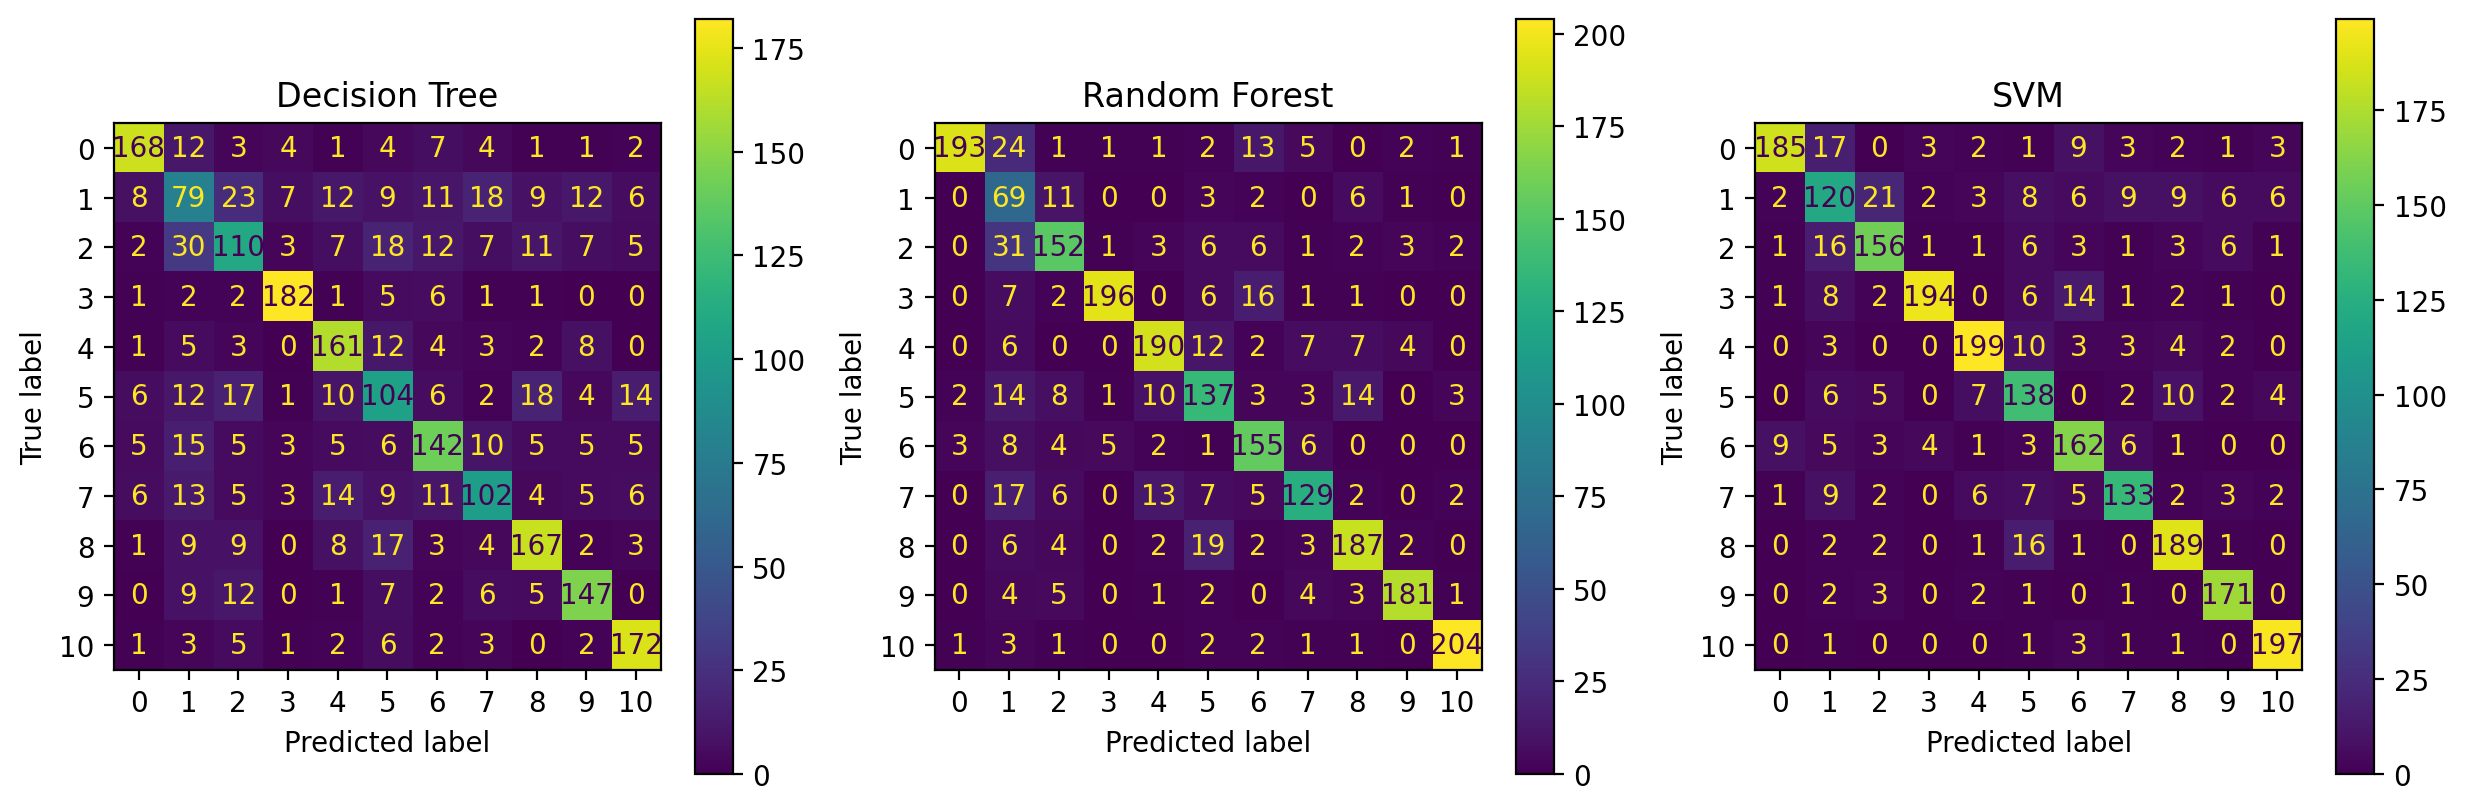

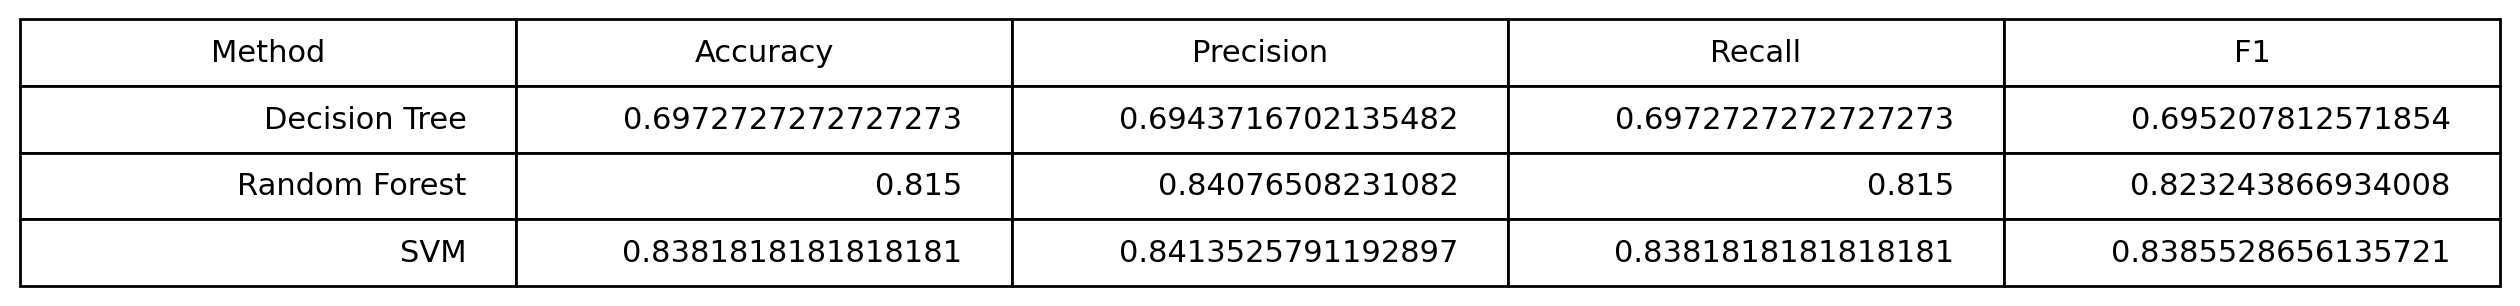

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5), dpi=200)
axes = axes.flatten()

axes[0].set_title("Decision Tree")
skmetrics.ConfusionMatrixDisplay.from_predictions(
    decision_tree_predicts,
    test_labels,
    ax=axes[0]
)

axes[1].set_title("Random Forest")
skmetrics.ConfusionMatrixDisplay.from_predictions(
    random_forest_predicts,
    test_labels,
    ax=axes[1]
)

axes[2].set_title("SVM")
skmetrics.ConfusionMatrixDisplay.from_predictions(
    svm_predicts,
    test_labels,
    ax=axes[2]
)

plt.show()

plt.figure(figsize=(8, 1), dpi=200)
table = plt.table(cellText=[
    [
        "Decision Tree",
        skmetrics.accuracy_score(decision_tree_predicts, test_labels),
        skmetrics.precision_score(decision_tree_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.recall_score(decision_tree_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.f1_score(decision_tree_predicts, test_labels, average="weighted", zero_division=True)
    ],
    [
        "Random Forest",
        skmetrics.accuracy_score(random_forest_predicts, test_labels),
        skmetrics.precision_score(random_forest_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.recall_score(random_forest_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.f1_score(random_forest_predicts, test_labels, average="weighted", zero_division=True)
    ],
    [
        "SVM",
        skmetrics.accuracy_score(svm_predicts, test_labels),
        skmetrics.precision_score(svm_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.recall_score(svm_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.f1_score(svm_predicts, test_labels, average="weighted", zero_division=True)
    ],
], colLabels=["Method", "Accuracy", "Precision", "Recall", "F1"], loc="center")
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(2, 2)
plt.axis("off")
plt.show()

---